In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import sys
import importlib
sys.path.append('../')

import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\USUARIO\\Desktop\\Projects\\4Geeks_temporal_series\\src\\lake\\..\\utils.py'>

In [16]:
df = pd.read_csv('../../data/raw/Lake_Bilancino.csv')
df = utils.turn_column_into_date(df, 'Date')
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-04,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-05,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-07,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


# Valores faltantes

In [17]:
utils.get_null_percentage_per_column(df)

Temperature_Le_Croci    8.753597
Rainfall_S_Piero        8.738452
Rainfall_Mangona        8.738452
Rainfall_S_Agata        8.738452
Rainfall_Cavallina      8.738452
Rainfall_Le_Croci       8.738452
Flow_Rate               0.318037
Lake_Level              0.000000
dtype: float64

In [18]:
df = utils.remove_columns_with_nulls_percent(df, threshold=50)
df = utils.interpolate_df(df)

Columnas eliminadas por alto porcentaje de valores nulos (50%): []
Valores nulos después de la interpolación:
Series([], dtype: int64)


c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\lake\..\utils.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Relleno hacia adelante
c:\Users\USUARIO\Desktop\Projects\4Geeks_temporal_series\src\lake\..\utils.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Relleno hacia atrás


In [19]:
utils.get_null_percentage_per_column(df)

Rainfall_S_Piero        0.0
Rainfall_Mangona        0.0
Rainfall_S_Agata        0.0
Rainfall_Cavallina      0.0
Rainfall_Le_Croci       0.0
Temperature_Le_Croci    0.0
Lake_Level              0.0
Flow_Rate               0.0
dtype: float64

# Análisis de tendencias

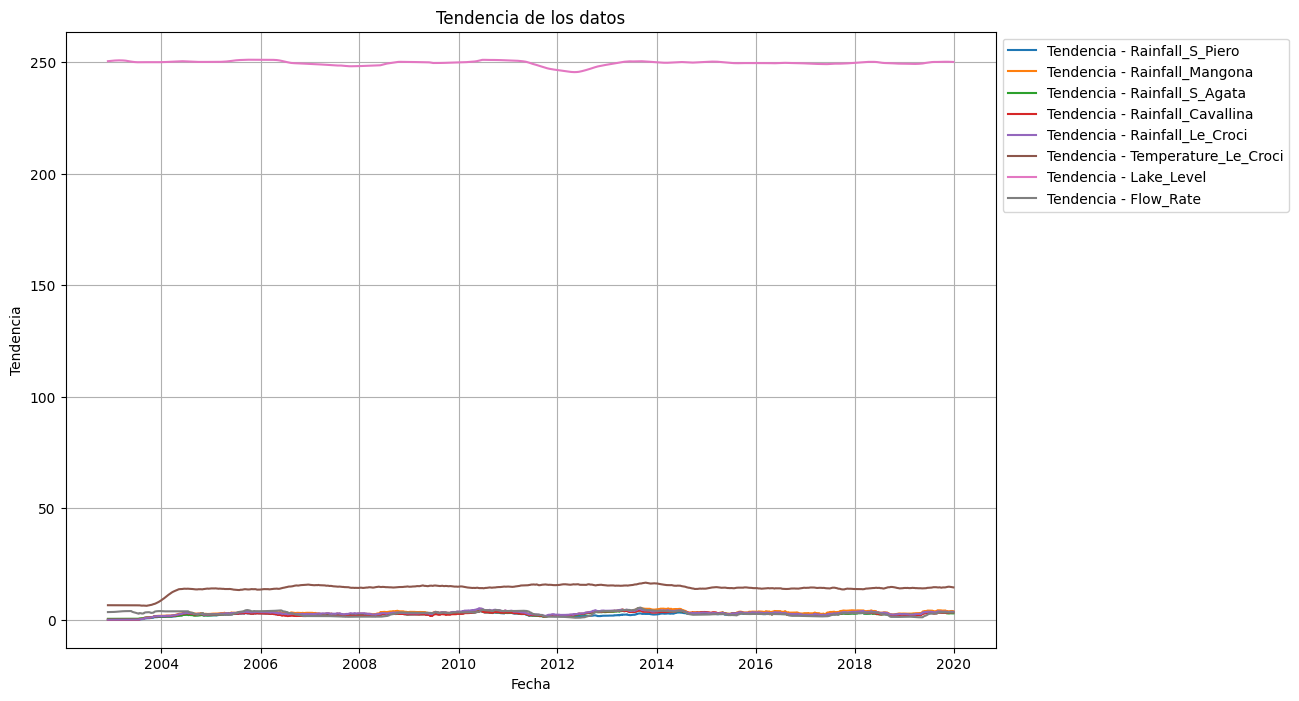

In [20]:
utils.plot_trend(df, period=365)

# Análisis de estacionalidad

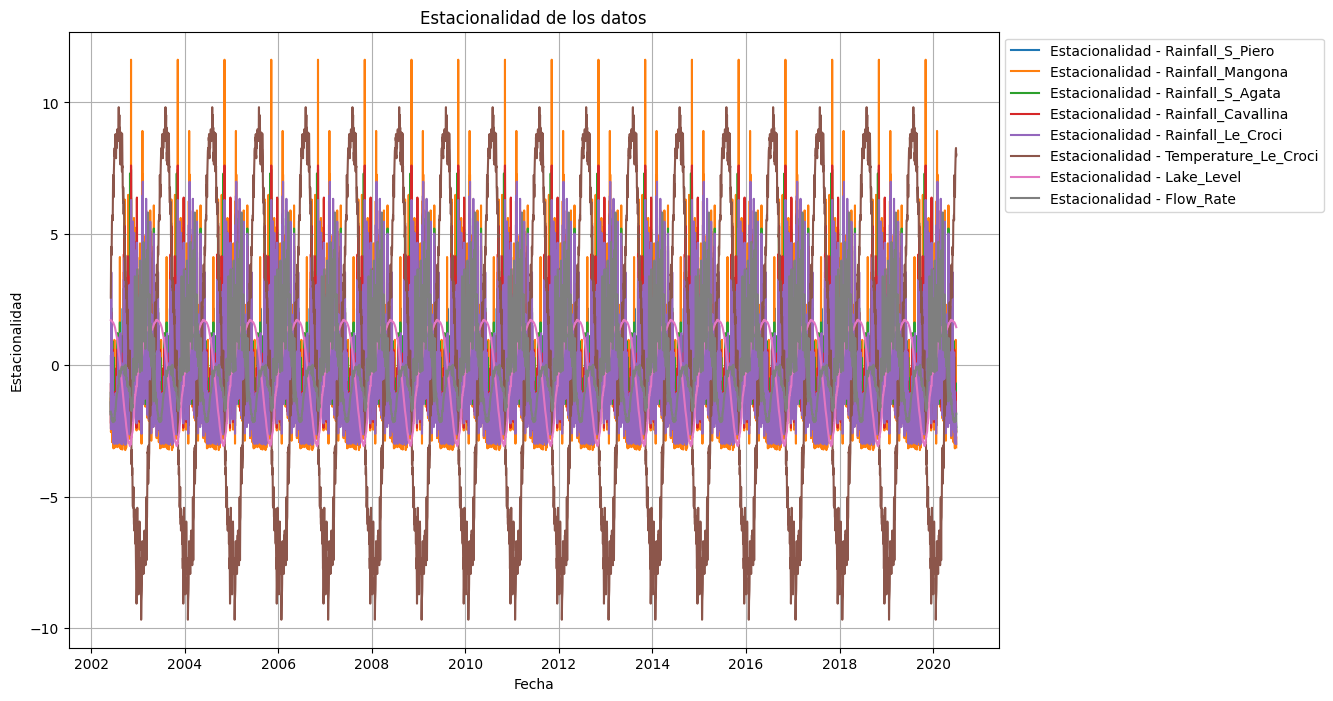

In [21]:
utils.plot_seasonality(df, period=365)

# Prueba de estacionariedad

In [22]:
utils.test_stationarity(df)

Resultados de la prueba de Dickey-Fuller para 'Rainfall_S_Piero':
Test Statistic                -1.168841e+01
p-value                        1.675339e-21
#Lags Used                     2.700000e+01
Number of Observations Used    6.575000e+03
Critical Value (1%)           -3.431345e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Rainfall_Mangona':
Test Statistic                -9.872705e+00
p-value                        3.955934e-17
#Lags Used                     3.400000e+01
Number of Observations Used    6.568000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64
--------------------------------------------------------------------------------
Resultados de la prueba de Dickey-Fuller para 'Rainfall_S_Ag

# Análisis de variabilidad

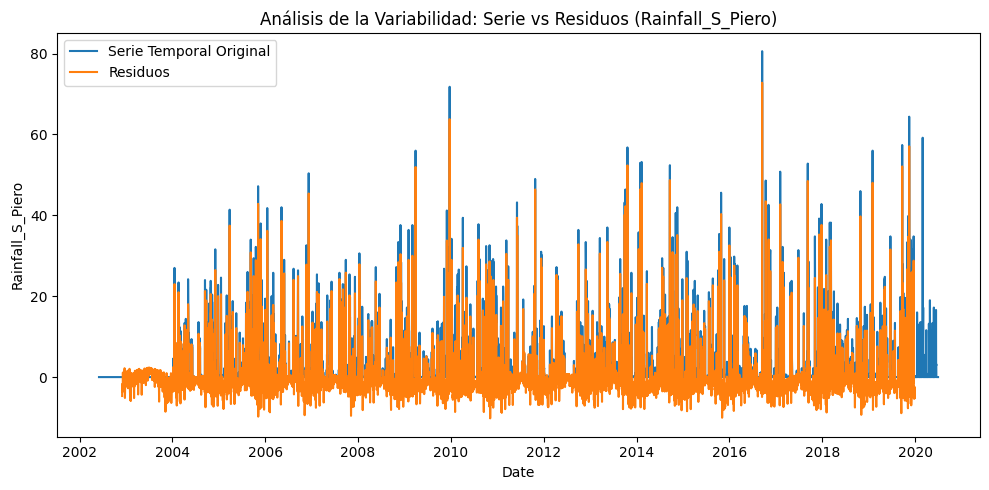

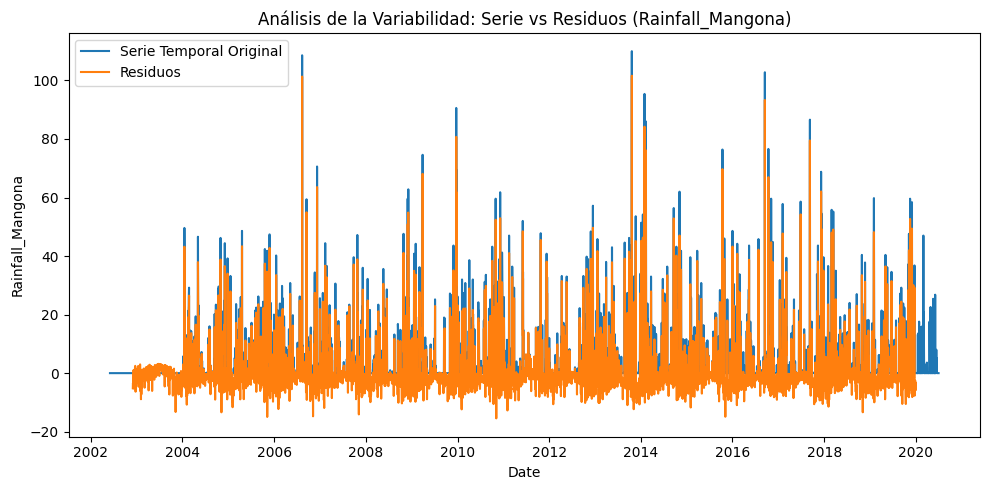

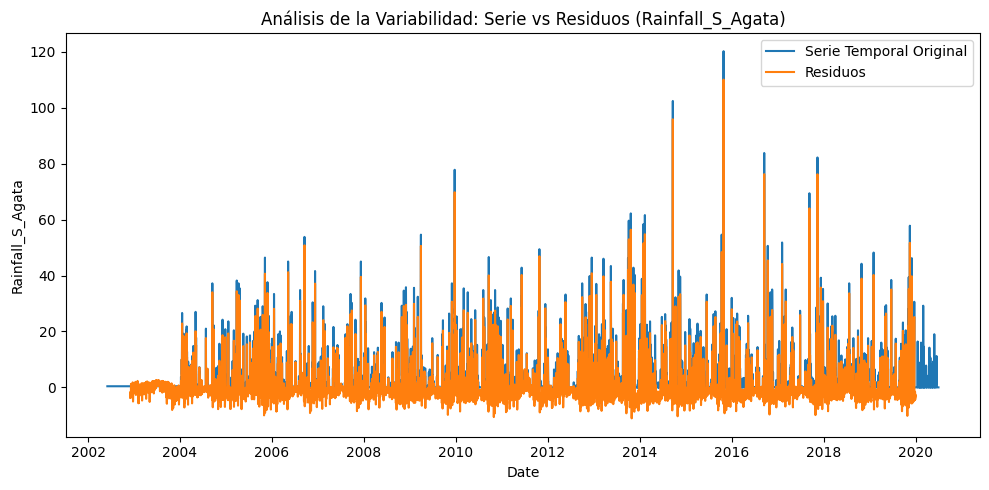

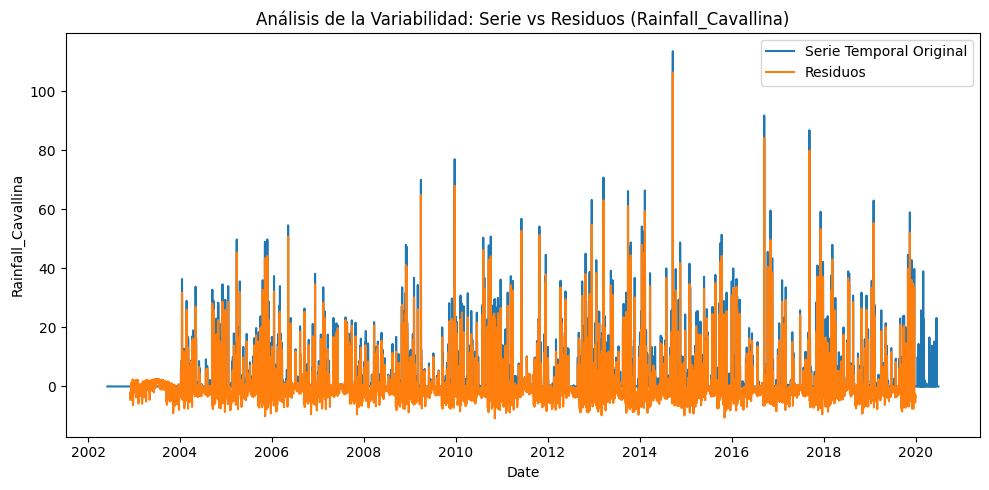

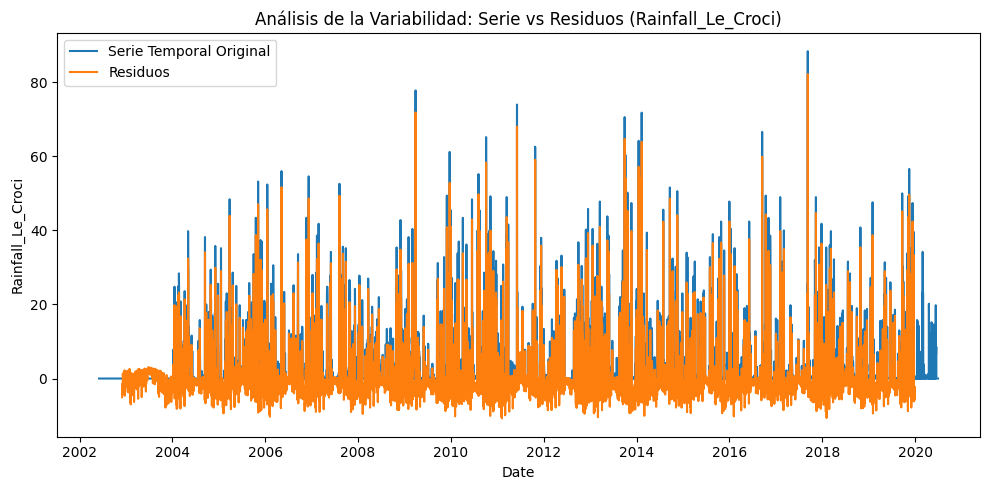

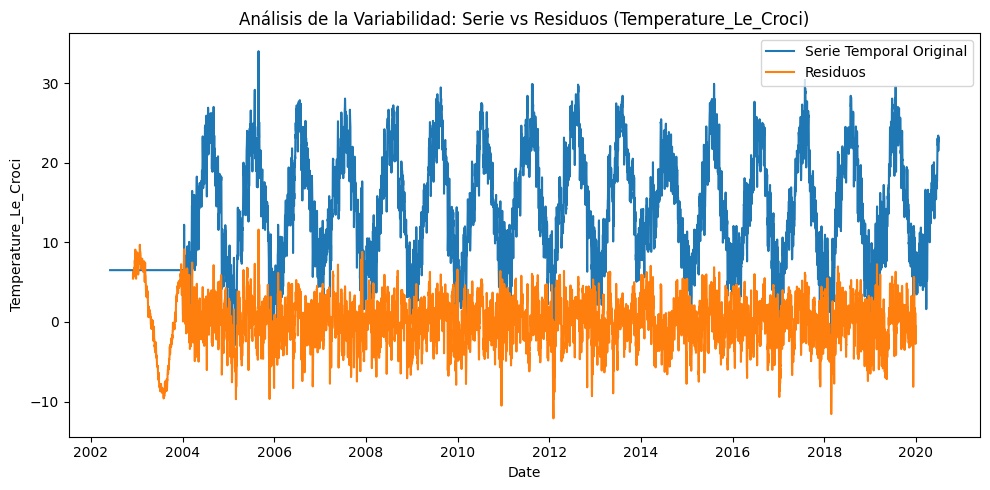

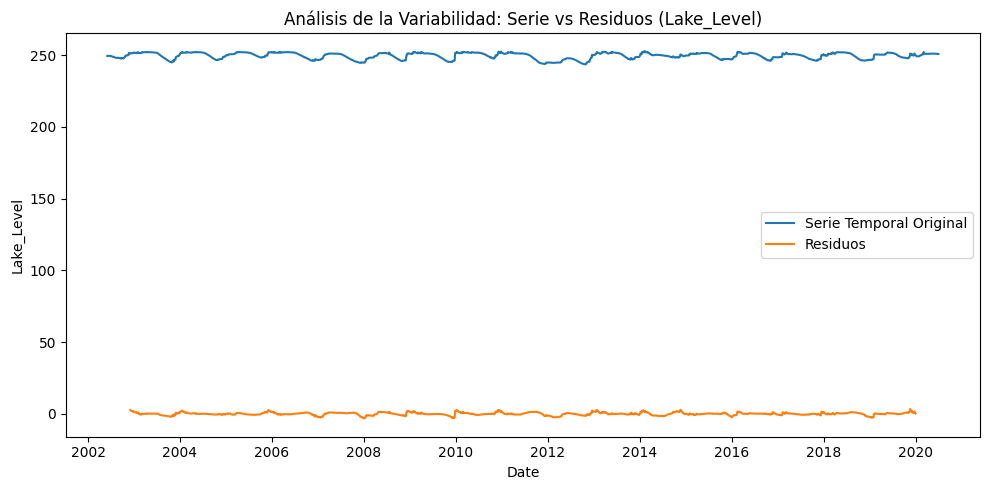

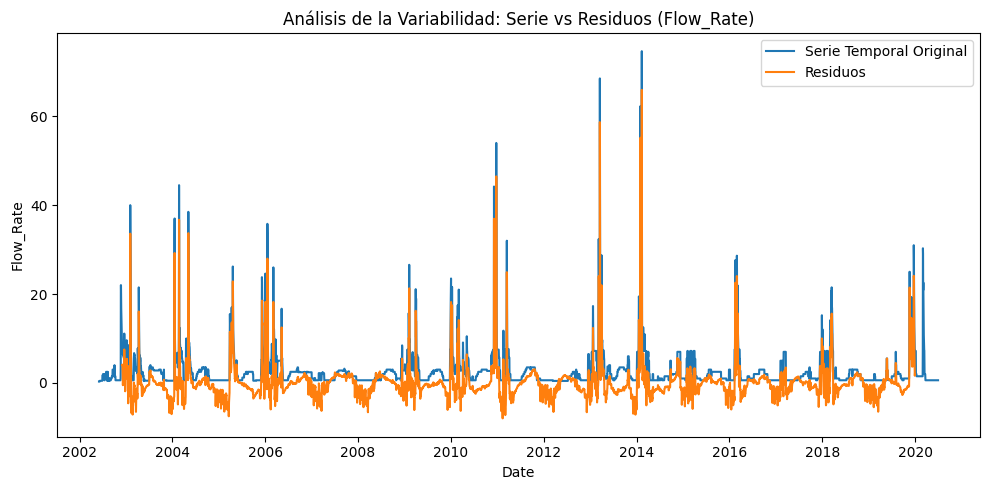

In [23]:
utils.plot_variability(df, period=365)

# Análisis de autocorrelación

<Figure size 1000x500 with 0 Axes>

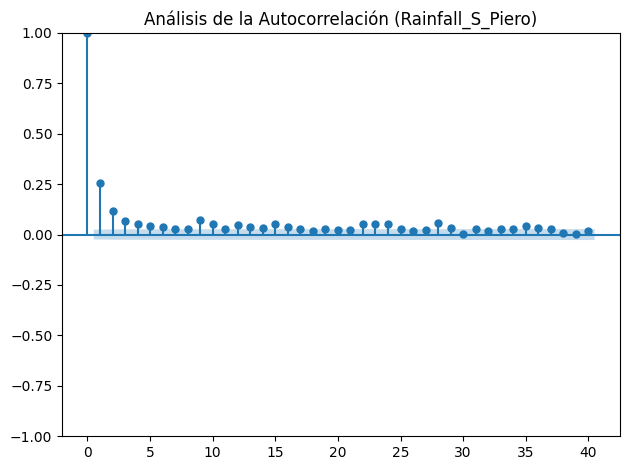

<Figure size 1000x500 with 0 Axes>

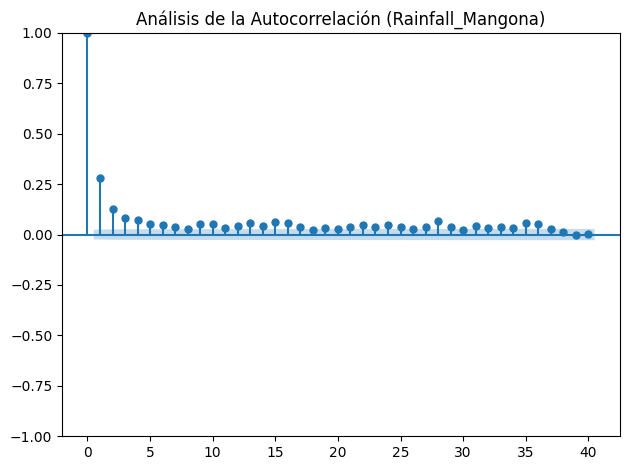

<Figure size 1000x500 with 0 Axes>

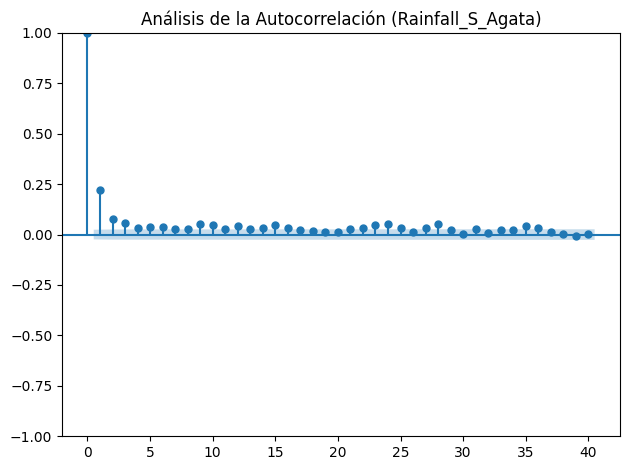

<Figure size 1000x500 with 0 Axes>

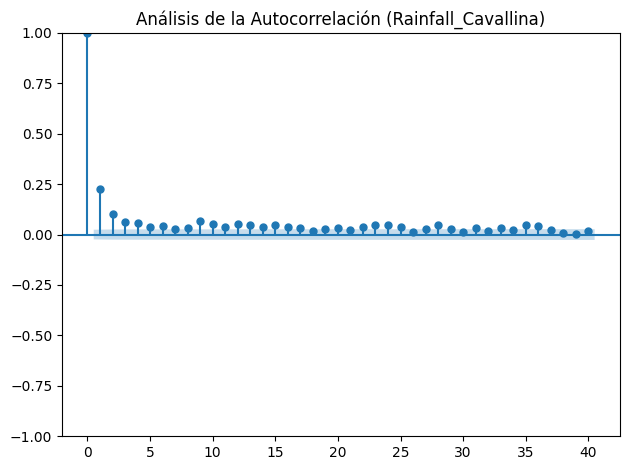

<Figure size 1000x500 with 0 Axes>

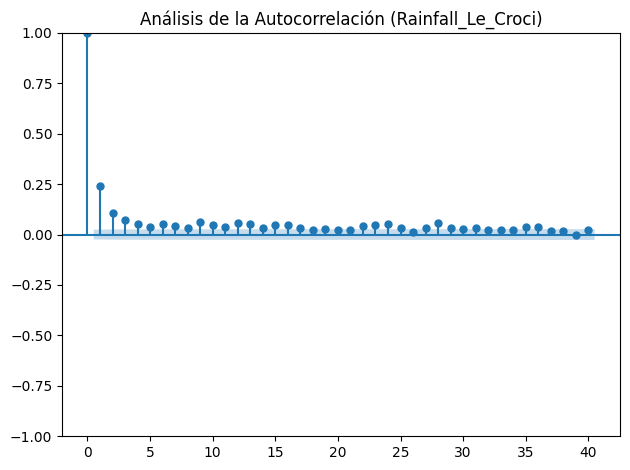

<Figure size 1000x500 with 0 Axes>

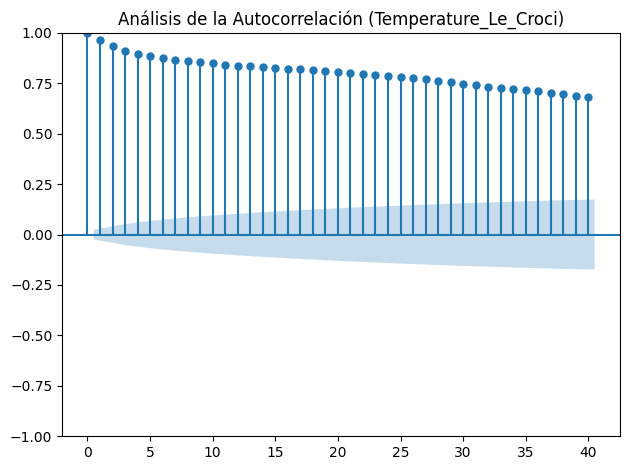

<Figure size 1000x500 with 0 Axes>

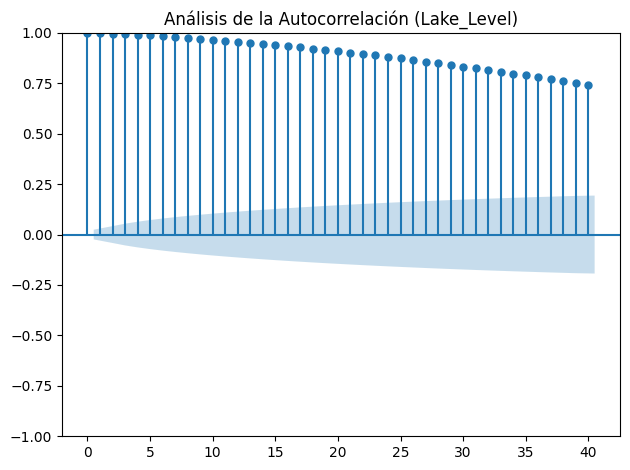

<Figure size 1000x500 with 0 Axes>

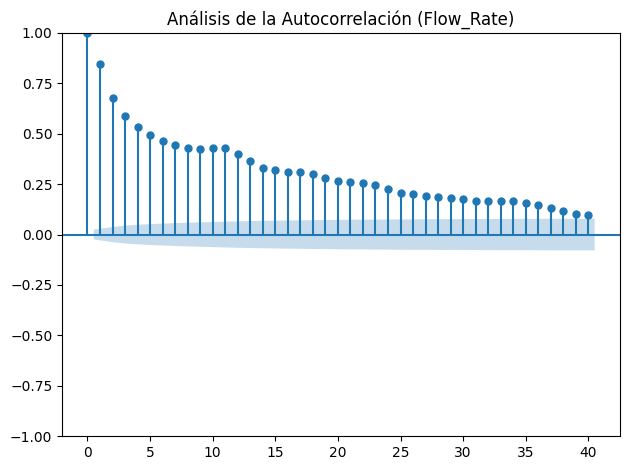

In [24]:
utils.plot_autocorrelation(df)

In [25]:
df.to_csv("../../data/processed/lake_bilancino.csv", index=True)